### text DATA RDD 활용 word counting

In [1]:
# hdfs에서 text파일을 line별로 읽어와서 line의 문자길이가 0보다 큰 경우(글자가 있는 경우)만 객체로 저장
dataRDD = sc.textFile('/rdd/shakespeare.txt').filter(lambda x: len(x) >0)
dataRDD.collect()

['THE SONNETS',
 'by William Shakespeare',
 'From fairest creatures we desire increase,',
 "That thereby beauty's rose might never die,",
 'But as the riper should by time decease,',
 'His tender heir might bear his memory:',
 'But thou contracted to thine own bright eyes,',
 "Feed'st thy light's flame with self-substantial fuel,",
 'Making a famine where abundance lies,',
 'Thy self thy foe, to thy sweet self too cruel:',
 "Thou that art now the world's fresh ornament,",
 'And only herald to the gaudy spring,',
 'Within thine own bud buriest thy content,',
 "And tender churl mak'st waste in niggarding:",
 'Pity the world, or else this glutton be,',
 "To eat the world's due, by the grave and thee.",
 'When forty winters shall besiege thy brow,',
 "And dig deep trenches in thy beauty's field,",
 "Thy youth's proud livery so gazed on now,",
 'Will be a tattered weed of small worth held:  ',
 'Then being asked, where all thy beauty lies,',
 'Where all the treasure of thy lusty days;',
 'T

In [10]:
import sys, re #정규식 패키지
#영문자와 숫자 그리고 밑줄문자(_) 이외의 문자가 1번이상 반복되면(\W+) 그 자리에서 split
#split 기준이 되는 문자는 제거되기 때문에 특수기호 제거해주는 \W+ 활용해서 데이터 추출
# map을 적용하면 2차원으로 반환
dataRDD.map(lambda x : re.split('\W+',x)).collect()

#1차원 평탄화까지 진행하는 flatMap()
# 글자 수 세려면 1차원으로 데이터가 유지되어야 하므로 flatMap()활용
print(dataRDD.flatMap(lambda x : re.split('\W+',x)).collect())

['THE', 'SONNETS', 'by', 'William', 'Shakespeare', 'From', 'fairest', 'creatures', 'we', 'desire', 'increase', '', 'That', 'thereby', 'beauty', 's', 'rose', 'might', 'never', 'die', '', 'But', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease', '', 'His', 'tender', 'heir', 'might', 'bear', 'his', 'memory', '', 'But', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes', '', 'Feed', 'st', 'thy', 'light', 's', 'flame', 'with', 'self', 'substantial', 'fuel', '', 'Making', 'a', 'famine', 'where', 'abundance', 'lies', '', 'Thy', 'self', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel', '', 'Thou', 'that', 'art', 'now', 'the', 'world', 's', 'fresh', 'ornament', '', 'And', 'only', 'herald', 'to', 'the', 'gaudy', 'spring', '', 'Within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content', '', 'And', 'tender', 'churl', 'mak', 'st', 'waste', 'in', 'niggarding', '', 'Pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be', '', 'To', 'eat', 'the', 'world', 's', 'due', 'b

In [8]:
# 결과: 빈문자열, 's에서 '이후 남은 1글자 단어 남음
print(dataRDD.flatMap(lambda x : re.split('\W+',x))\
        .filter(lambda x : len(x) > 1).collect()) #단어 하나씩 x에 대입됨

['THE', 'SONNETS', 'by', 'William', 'Shakespeare', 'From', 'fairest', 'creatures', 'we', 'desire', 'increase', 'That', 'thereby', 'beauty', 'rose', 'might', 'never', 'die', 'But', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease', 'His', 'tender', 'heir', 'might', 'bear', 'his', 'memory', 'But', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes', 'Feed', 'st', 'thy', 'light', 'flame', 'with', 'self', 'substantial', 'fuel', 'Making', 'famine', 'where', 'abundance', 'lies', 'Thy', 'self', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel', 'Thou', 'that', 'art', 'now', 'the', 'world', 'fresh', 'ornament', 'And', 'only', 'herald', 'to', 'the', 'gaudy', 'spring', 'Within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content', 'And', 'tender', 'churl', 'mak', 'st', 'waste', 'in', 'niggarding', 'Pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be', 'To', 'eat', 'the', 'world', 'due', 'by', 'the', 'grave', 'and', 'thee', 'When', 'forty', 'winters', 'shall', 'besi

In [12]:
# 위에서 생성한 각 단어를 key로, 1을 value로 갖는 pairRDD로 변환
# 단어,1로 맵 생성(모든 단어 소문자화)
dataRDD.flatMap(lambda x: re.split('\W+',x))\
        .filter(lambda x: len(x) > 1)\
        .map(lambda x: (x.lower(),1)).collect()

[('THE', 1),
 ('SONNETS', 1),
 ('by', 1),
 ('William', 1),
 ('Shakespeare', 1),
 ('From', 1),
 ('fairest', 1),
 ('creatures', 1),
 ('we', 1),
 ('desire', 1),
 ('increase', 1),
 ('That', 1),
 ('thereby', 1),
 ('beauty', 1),
 ('rose', 1),
 ('might', 1),
 ('never', 1),
 ('die', 1),
 ('But', 1),
 ('as', 1),
 ('the', 1),
 ('riper', 1),
 ('should', 1),
 ('by', 1),
 ('time', 1),
 ('decease', 1),
 ('His', 1),
 ('tender', 1),
 ('heir', 1),
 ('might', 1),
 ('bear', 1),
 ('his', 1),
 ('memory', 1),
 ('But', 1),
 ('thou', 1),
 ('contracted', 1),
 ('to', 1),
 ('thine', 1),
 ('own', 1),
 ('bright', 1),
 ('eyes', 1),
 ('Feed', 1),
 ('st', 1),
 ('thy', 1),
 ('light', 1),
 ('flame', 1),
 ('with', 1),
 ('self', 1),
 ('substantial', 1),
 ('fuel', 1),
 ('Making', 1),
 ('famine', 1),
 ('where', 1),
 ('abundance', 1),
 ('lies', 1),
 ('Thy', 1),
 ('self', 1),
 ('thy', 1),
 ('foe', 1),
 ('to', 1),
 ('thy', 1),
 ('sweet', 1),
 ('self', 1),
 ('too', 1),
 ('cruel', 1),
 ('Thou', 1),
 ('that', 1),
 ('art', 1),
 (

In [13]:
# 동일 단어 카운팅
# reduceByKey에 의해 동일단어별로 그룹핑, lambda 함수에 의해서 동일단어 그룹 내 value들을 모두 더한 결과 반환
dataRDD.flatMap(lambda x: re.split('\W+',x))\
        .filter(lambda x: len(x) > 1)\
        .map(lambda x: (x.lower(),1))\
        .reduceByKey(lambda x,y: x+y).collect()

[('shakespeare', 1),
 ('fairest', 5),
 ('creatures', 2),
 ('we', 15),
 ('increase', 4),
 ('thereby', 2),
 ('beauty', 70),
 ('rose', 6),
 ('never', 16),
 ('die', 12),
 ('but', 163),
 ('as', 121),
 ('riper', 2),
 ('his', 107),
 ('tender', 7),
 ('heir', 3),
 ('bear', 13),
 ('thou', 235),
 ('thine', 44),
 ('own', 30),
 ('bright', 11),
 ('eyes', 53),
 ('feed', 2),
 ('st', 52),
 ('thy', 287),
 ('flame', 3),
 ('self', 88),
 ('substantial', 1),
 ('fuel', 1),
 ('making', 12),
 ('famine', 1),
 ('where', 41),
 ('abundance', 4),
 ('sweet', 57),
 ('now', 46),
 ('world', 33),
 ('ornament', 5),
 ('only', 6),
 ('herald', 1),
 ('churl', 2),
 ('mak', 2),
 ('in', 323),
 ('pity', 9),
 ('this', 105),
 ('due', 6),
 ('grave', 3),
 ('when', 106),
 ('forty', 1),
 ('winters', 2),
 ('besiege', 2),
 ('brow', 8),
 ('dig', 1),
 ('field', 1),
 ('weed', 3),
 ('of', 370),
 ('worth', 20),
 ('treasure', 9),
 ('days', 17),
 ('say', 28),
 ('an', 17),
 ('eating', 1),
 ('praise', 28),
 ('more', 64),
 ('use', 13),
 ('couldst

In [14]:
# 카운팅 수가 많은 단어부터 내림차순 정렬
dataRDD.flatMap(lambda x: re.split('\W+',x))\
        .filter(lambda x: len(x) > 1)\
        .map(lambda x: (x.lower(),1))\
        .reduceByKey(lambda x,y: x+y)\
        .sortBy(lambda x: x[1], ascending=False).collect()

[('and', 490),
 ('the', 432),
 ('to', 414),
 ('my', 393),
 ('of', 370),
 ('in', 323),
 ('that', 323),
 ('thy', 287),
 ('thou', 235),
 ('love', 194),
 ('with', 181),
 ('for', 172),
 ('is', 170),
 ('not', 167),
 ('me', 164),
 ('but', 163),
 ('thee', 162),
 ('so', 145),
 ('be', 142),
 ('as', 121),
 ('all', 120),
 ('you', 112),
 ('it', 111),
 ('which', 108),
 ('his', 107),
 ('when', 106),
 ('this', 105),
 ('your', 100),
 ('by', 94),
 ('self', 88),
 ('doth', 88),
 ('do', 84),
 ('from', 82),
 ('on', 80),
 ('no', 79),
 ('or', 79),
 ('have', 77),
 ('then', 74),
 ('what', 73),
 ('beauty', 70),
 ('time', 70),
 ('are', 69),
 ('if', 68),
 ('more', 64),
 ('will', 64),
 ('their', 63),
 ('mine', 63),
 ('shall', 59),
 ('heart', 58),
 ('sweet', 57),
 ('eyes', 53),
 ('st', 52),
 ('nor', 52),
 ('art', 52),
 ('they', 52),
 ('her', 51),
 ('yet', 51),
 ('than', 48),
 ('now', 46),
 ('thine', 44),
 ('he', 44),
 ('fair', 44),
 ('can', 44),
 ('should', 44),
 ('make', 43),
 ('hath', 43),
 ('one', 43),
 ('where',

In [19]:
# 셰익스피어 소네트(shakespeare.txt) 워드카운팅
# 위 코드 모두 결합
import sys, re
dataRDD = sc.textFile('/rdd/shakespeare.txt').filter(lambda x: len(x) >0)
wordcount = dataRDD.flatMap(lambda x: re.split('\W+',x))\
                    .filter(lambda x: len(x) > 1)\
                    .map(lambda x: (x.lower(),1))\
                    .reduceByKey(lambda x,y: x+y)\
                    .sortBy(lambda x: x[1], ascending=False)

### wordcounting 시각화
- wordcounting
    - 주어진 문자열을 단어로 분리하고 각 단어별 계수하는 분석 방법
    - 리뷰, 신문기사, 커뮤니티의 게시글 등에서 많이 표현된 단어를 확인해서 현재 관심사 등을 확인할 때 사용하는 분석방법
    - 시각화
      - 그래프, 워드크라우드 등 활용

In [15]:
#!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 3.3 MB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 8.3 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 5.9 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 KB 4.3 MB/s eta 0:00:00


In [20]:
wordcnt = wordcount.collect()
type(wordcnt) #RDD객체가 아닌 일반 파이썬 변수 list
dict(wordcnt)s

list

In [22]:
from wordcloud import WordCloud
# WordCloud() 생성자 함수 안에 필요한 설정 가능
# WordCloud(width=, height=, background_color=, max_font_size=, max_words='표현되는 최대 단어 수')
word_c = WordCloud(width=800, height=400, background_color='white', 
                   max_font_size=100, max_words=100)
# 실행해서 출력(wordcloud 그릴 data 전달 - dict형태로 전달)
    # WordCloud객체.generate_from_frequencies(data)
word_c.generate_from_frequencies(dict(wordcnt))
word_c.to_file('sonnet.jpg')

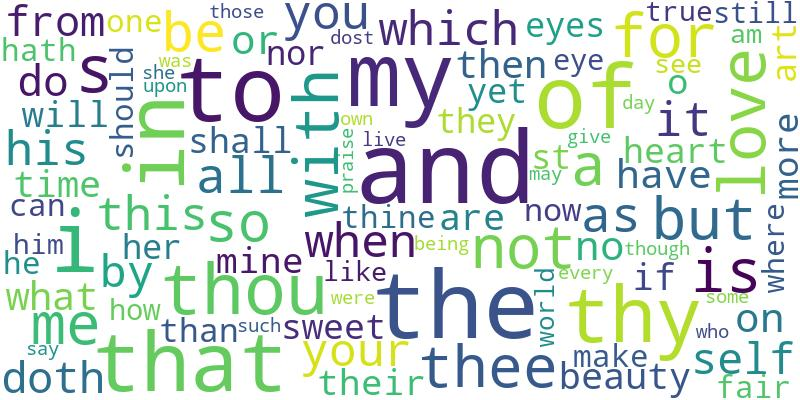

In [24]:
# nltk의 도움을 받아 명사만 카운팅해보자
# https://www.nltk.org/book/ch00.html#natural-language-toolkit-nltk 문서에서 태깅관련 모듈 확인하기
# https://www.nltk.org/book/ch05.html 문서에서 코드 따라하기
# 에러 발생할 경우 로그에서 nltk.download() 코드 복붙

#!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 KB 2.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 6.9 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 1.4 MB/s eta 0:00:003.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 KB 2.4 MB/s eta 0:00:005.7 MB/s eta 0:00:01


In [25]:
import nltk
from nltk.tokenize import word_tokenize

In [31]:
# 필요 tagger module 다운로드
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### map(참고)
- spark의 map은 scala나 python에서 제공하는 map과 크게 다르지 않다
- python에서 제공하는 map
    - 함수를 인자로 갖고,
    - 리스트와 같은 iterable 자료구조의 모든 요소에 그 함수를 적용시키고,
    - 그 결과로 구성된 map 객체를 다시 돌려줌
- spark의 map도 자료구조가 RDD라는 점이 다르고 작동은 비슷

In [39]:
sonnets = sc.textFile('/rdd/shakespeare.txt').filter(lambda x : len(x) > 0).collect()
sonnets

['THE SONNETS',
 'by William Shakespeare',
 'From fairest creatures we desire increase,',
 "That thereby beauty's rose might never die,",
 'But as the riper should by time decease,',
 'His tender heir might bear his memory:',
 'But thou contracted to thine own bright eyes,',
 "Feed'st thy light's flame with self-substantial fuel,",
 'Making a famine where abundance lies,',
 'Thy self thy foe, to thy sweet self too cruel:',
 "Thou that art now the world's fresh ornament,",
 'And only herald to the gaudy spring,',
 'Within thine own bud buriest thy content,',
 "And tender churl mak'st waste in niggarding:",
 'Pity the world, or else this glutton be,',
 "To eat the world's due, by the grave and thee.",
 'When forty winters shall besiege thy brow,',
 "And dig deep trenches in thy beauty's field,",
 "Thy youth's proud livery so gazed on now,",
 'Will be a tattered weed of small worth held:  ',
 'Then being asked, where all thy beauty lies,',
 'Where all the treasure of thy lusty days;',
 'T

In [45]:
## sonnets 각 라인별문장에 대해서 word_tokenize()를 적용한 결과를 돌려줌
## word_tokenize()함수는 nltk.tokenize()함수를 호출하는 래커함수 : 공백과 .을 기준으로 단어 분할(.은 버리지 않는다)
# map(실행함수, data)
sonnets_token = map(lambda t: word_tokenize(t), sonnets)

#list(tmp) 로 해주면 map 객체 내부 data가 지워지기 때문에
list(map(lambda t: word_tokenize(t), sonnets))
#이 코드 활용하여 내용 잘 출력되는지 확인한다.

# 1: 공백 기준 분리
# 특수기호 만나면 특수기호에서 분리
# increase, : increase단어와 , 특수기호로 분리
# 특수기호는 유지됨

[['THE', 'SONNETS'],
 ['by', 'William', 'Shakespeare'],
 ['From', 'fairest', 'creatures', 'we', 'desire', 'increase', ','],
 ['That', 'thereby', 'beauty', "'s", 'rose', 'might', 'never', 'die', ','],
 ['But', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease', ','],
 ['His', 'tender', 'heir', 'might', 'bear', 'his', 'memory', ':'],
 ['But', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes', ','],
 ["Feed'st",
  'thy',
  'light',
  "'s",
  'flame',
  'with',
  'self-substantial',
  'fuel',
  ','],
 ['Making', 'a', 'famine', 'where', 'abundance', 'lies', ','],
 ['Thy',
  'self',
  'thy',
  'foe',
  ',',
  'to',
  'thy',
  'sweet',
  'self',
  'too',
  'cruel',
  ':'],
 ['Thou',
  'that',
  'art',
  'now',
  'the',
  'world',
  "'s",
  'fresh',
  'ornament',
  ','],
 ['And', 'only', 'herald', 'to', 'the', 'gaudy', 'spring', ','],
 ['Within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content', ','],
 ['And', 'tender', 'churl', "mak'st", 'waste', 'in', 'niggarding', ':'],
 [

In [41]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [52]:
# 토큰화 된 단어를 품사 분류
# pos_tag()함수 : 품사 분류 함수 (NN: 명사)
# sonnets_token : 1차원 map 객체
sonnets_token = map(lambda t: word_tokenize(t), sonnets)
tmp = map(lambda t: nltk.pos_tag(t), sonnets_token) # 파이썬객체 -> rdd객체로 변경해서 다음 작업 진행 예정
# list(map(lambda t: nltk.pos_tag(t), sonnets_token)) #map객체를 list화 해서 rdd로 변환

tagged = list(tmp) #토큰별로 품사 태깅 되어있는 2차원data가 저장

In [53]:
# rdd 객체
# 품사태깅 data rdd 객체로 변환 -> 1차원으로 변경
sc.parallelize(tagged).flatMap(lambda e: e).collect()

[('THE', 'DT'),
 ('SONNETS', 'NNP'),
 ('by', 'IN'),
 ('William', 'NNP'),
 ('Shakespeare', 'NNP'),
 ('From', 'IN'),
 ('fairest', 'JJS'),
 ('creatures', 'NNS'),
 ('we', 'PRP'),
 ('desire', 'VBP'),
 ('increase', 'NN'),
 (',', ','),
 ('That', 'DT'),
 ('thereby', 'VBZ'),
 ('beauty', 'NN'),
 ("'s", 'POS'),
 ('rose', 'VBD'),
 ('might', 'MD'),
 ('never', 'RB'),
 ('die', 'VB'),
 (',', ','),
 ('But', 'CC'),
 ('as', 'IN'),
 ('the', 'DT'),
 ('riper', 'NN'),
 ('should', 'MD'),
 ('by', 'IN'),
 ('time', 'NN'),
 ('decease', 'NN'),
 (',', ','),
 ('His', 'PRP$'),
 ('tender', 'NN'),
 ('heir', 'NN'),
 ('might', 'MD'),
 ('bear', 'VB'),
 ('his', 'PRP$'),
 ('memory', 'NN'),
 (':', ':'),
 ('But', 'CC'),
 ('thou', 'RB'),
 ('contracted', 'VBD'),
 ('to', 'TO'),
 ('thine', 'VB'),
 ('own', 'JJ'),
 ('bright', 'JJ'),
 ('eyes', 'NNS'),
 (',', ','),
 ("Feed'st", 'NNP'),
 ('thy', 'VBD'),
 ('light', 'NN'),
 ("'s", 'POS'),
 ('flame', 'NN'),
 ('with', 'IN'),
 ('self-substantial', 'JJ'),
 ('fuel', 'NN'),
 (',', ','),
 ('Ma

In [54]:
# 품사가 명사인 data만 추출해서 data별로 counting할 예정 - value 변경 후 counting
sc.parallelize(tagged).flatMap(lambda e: e)\
    .filter(lambda e: e[1]=='NN').collect()

[('increase', 'NN'),
 ('beauty', 'NN'),
 ('riper', 'NN'),
 ('time', 'NN'),
 ('decease', 'NN'),
 ('tender', 'NN'),
 ('heir', 'NN'),
 ('memory', 'NN'),
 ('light', 'NN'),
 ('flame', 'NN'),
 ('fuel', 'NN'),
 ('famine', 'NN'),
 ('abundance', 'NN'),
 ('foe', 'NN'),
 ('Thou', 'NN'),
 ('art', 'NN'),
 ('world', 'NN'),
 ('ornament', 'NN'),
 ('herald', 'NN'),
 ('gaudy', 'NN'),
 ('spring', 'NN'),
 ('bud', 'NN'),
 ('content', 'NN'),
 ('tender', 'NN'),
 ('churl', 'NN'),
 ("mak'st", 'NN'),
 ('waste', 'NN'),
 ('niggarding', 'NN'),
 ('world', 'NN'),
 ('glutton', 'NN'),
 ('world', 'NN'),
 ('grave', 'NN'),
 ('thee', 'NN'),
 ('forty', 'NN'),
 ('brow', 'NN'),
 ('beauty', 'NN'),
 ('field', 'NN'),
 ('youth', 'NN'),
 ('livery', 'NN'),
 ('weed', 'NN'),
 ('beauty', 'NN'),
 ('treasure', 'NN'),
 ('deep', 'NN'),
 ('shame', 'NN'),
 ('praise', 'NN'),
 ('beauty', 'NN'),
 ('use', 'NN'),
 ('couldst', 'NN'),
 ('answer', 'NN'),
 ('child', 'NN'),
 ('mine', 'NN'),
 ('sum', 'NN'),
 ('count', 'NN'),
 ('excuse', 'NN'),
 ('bea

In [56]:
# 위에서 생성된 rdd에서 key data만 추출하고 pairRDD를 (key, 1) 형태로 변환하는 작업
# 명사 토큰 counting을 위해 value를 1로 초기화
sc.parallelize(tagged)\
    .flatMap(lambda e: e)\
    .filter(lambda e: e[1]=='NN')\
    .map(lambda e: (e[0].lower(),1)).collect()

[('increase', 1),
 ('beauty', 1),
 ('riper', 1),
 ('time', 1),
 ('decease', 1),
 ('tender', 1),
 ('heir', 1),
 ('memory', 1),
 ('light', 1),
 ('flame', 1),
 ('fuel', 1),
 ('famine', 1),
 ('abundance', 1),
 ('foe', 1),
 ('thou', 1),
 ('art', 1),
 ('world', 1),
 ('ornament', 1),
 ('herald', 1),
 ('gaudy', 1),
 ('spring', 1),
 ('bud', 1),
 ('content', 1),
 ('tender', 1),
 ('churl', 1),
 ("mak'st", 1),
 ('waste', 1),
 ('niggarding', 1),
 ('world', 1),
 ('glutton', 1),
 ('world', 1),
 ('grave', 1),
 ('thee', 1),
 ('forty', 1),
 ('brow', 1),
 ('beauty', 1),
 ('field', 1),
 ('youth', 1),
 ('livery', 1),
 ('weed', 1),
 ('beauty', 1),
 ('treasure', 1),
 ('deep', 1),
 ('shame', 1),
 ('praise', 1),
 ('beauty', 1),
 ('use', 1),
 ('couldst', 1),
 ('answer', 1),
 ('child', 1),
 ('mine', 1),
 ('sum', 1),
 ('count', 1),
 ('excuse', 1),
 ('beauty', 1),
 ('succession', 1),
 ('thine', 1),
 ('art', 1),
 ('blood', 1),
 ('warm', 1),
 ('thou', 1),
 ('look', 1),
 ('glass', 1),
 ('face', 1),
 ('thou', 1),
 ('v

In [57]:
###복사필요
sc.parallelize(tagged)\
    .flatMap(lambda e: e)\
    .filter(lambda e: e[1]=='NN')\
    .map(lambda e: (e[0].lower(),1))\
    .reduceByKey(lambda x,y : x+y).collect()

[('year', 5),
 ('thou', 88),
 ('behold', 2),
 ('none', 13),
 ('cold', 2),
 ('sunset', 1),
 ('night', 22),
 ('self', 57),
 ('rest', 6),
 ('fire', 10),
 ('lie', 7),
 ('bail', 2),
 ('line', 3),
 ('interest', 2),
 ('dost', 18),
 ('earth', 12),
 ('spirit', 10),
 ('hast', 9),
 ('dregs', 1),
 ('prey', 2),
 ('worth', 17),
 ('ground', 3),
 ('peace', 2),
 ('miser', 1),
 ('wealth', 6),
 ('filching', 1),
 ('treasure', 9),
 ('world', 32),
 ('look', 8),
 ('delight', 8),
 ('verse', 12),
 ('pride', 11),
 ('change', 7),
 ('invention', 5),
 ('weed', 3),
 ('name', 16),
 ('sun', 12),
 ('love', 126),
 ('glass', 10),
 ('mind', 17),
 ('imprint', 1),
 ('book', 5),
 ('progress', 1),
 ('commit', 1),
 ('shalt', 9),
 ('profit', 1),
 ('muse', 8),
 ('assistance', 1),
 ('alien', 1),
 ('use', 6),
 ('influence', 2),
 ('style', 3),
 ('learning', 1),
 ('grace', 7),
 ('doth', 27),
 ('thy', 16),
 ('travail', 1),
 ('poet', 4),
 ('invent', 2),
 ('virtue', 7),
 ('behaviour', 1),
 ('beauty', 65),
 ('praise', 22),
 ('pay', 2),

In [60]:
## 위 코드 모두 결합
word_cntNN = sc.parallelize(tagged)\
    .flatMap(lambda e: e)\
    .filter(lambda e: e[1]=='NN')\
    .map(lambda e: (e[0].lower(),1))\
    .reduceByKey(lambda x,y : x+y)\
    .sortBy(lambda e: e[1], ascending=False)
word_cntNN.collect()

[('love', 126),
 ('thee', 96),
 ('thou', 88),
 ('beauty', 65),
 ('self', 57),
 ('heart', 57),
 ('time', 53),
 ('art', 42),
 ('eye', 40),
 ('world', 32),
 ('mine', 28),
 ('doth', 27),
 ('hath', 27),
 ('day', 26),
 ('life', 24),
 ('night', 22),
 ('praise', 22),
 ('truth', 22),
 ('part', 20),
 ('thine', 19),
 ('summer', 19),
 ('face', 19),
 ('dost', 18),
 ('nothing', 18),
 ('hand', 18),
 ('death', 18),
 ('worth', 17),
 ('mind', 17),
 ('age', 17),
 ('sight', 17),
 ('name', 16),
 ('thy', 16),
 ('friend', 15),
 ('youth', 14),
 ('none', 13),
 ('hate', 13),
 ('state', 13),
 ('earth', 12),
 ('verse', 12),
 ('sun', 12),
 ('nature', 12),
 ('thing', 12),
 ('tongue', 12),
 ('pride', 11),
 ('thought', 11),
 ('ill', 11),
 ('end', 11),
 ('pleasure', 11),
 ('mayst', 11),
 ('fair', 11),
 ('fire', 10),
 ('spirit', 10),
 ('glass', 10),
 ('form', 10),
 ('sweet', 10),
 ('kind', 10),
 ('show', 10),
 ('place', 10),
 ('heaven', 10),
 ('soul', 10),
 ('hast', 9),
 ('treasure', 9),
 ('shalt', 9),
 ('store', 9),
 

In [62]:
# rdd객체 -> text파일로 hdfs에 쓰기
word_cntNN.saveAsTextFile('/rdd/word_cntNN_sort')

In [63]:
# 워드 클라우드 그리기
from wordcloud import WordCloud

word_c = WordCloud(width=800, height=400, background_color='white', 
                   max_font_size=100, max_words=100)
# 실행해서 출력(wordcloud 그릴 data 전달 - dict형태로 전달)
    # WordCloud객체.generate_from_frequencies(data)
word_c.generate_from_frequencies(dict(word_cntNN.collect()))
word_c.to_file('sonnet_nn.jpg')

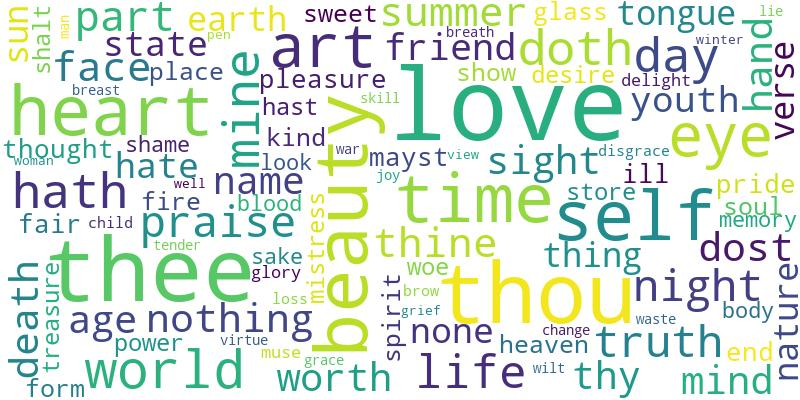

- 결론 :  소네트는 사랑에 대한 이야기를 하는 시이다.
- 사랑 이야기 하는데 death가 자주 쓰인 것으로 보아 셰익스피어는 90년대 한국대중가요 감성이다.
